In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
from scipy.optimize import curve_fit
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

In [2]:
################# ALL

#target_all = ['1998sn165', '1999de9', '2000cm105' , '2000ok67', '2001hz58', '2001kn76', '2001qb298', '2001qj298', '2001qt322', '2001qx297', '2001xd255', '2001xp254', '2001xu254', '2001yh140', '2002cy224', '2002gj32', '2002gv31', '2002vs130', '2002vt130', '2003fc138', '2003fe128', '2003gh55', '2003qa92', '2003ys179', '2004tf282', '2004tv357', '2005eo304', '2005ez296', '2005rs43', '2005tb190', '2007jj43', '2007or10', '2008cs180', '2009yg19', '2010ep65', '2010et65', '2010fc49', '2011jf31', '2012dw98', '2013ap183', '2013at183', '2013fa28', '2013jv65', '2014am55', '2014df143', '2014dj143', '2014ez51', '2014gd54', '2014ge45', '2014gj54', '2014hf200', '2014ls28', '2014wa509', '2014wa510', '2014wj510', '2014wo509', '2014ws510', '2014ye50', '2014yj50', '2015bb519', '2015bc519', '2015bz518', '2015da225', 'borasisi', 'pluto', 'praamzius', 'quaoar']

target_all =['1998sn165', '1999de9', '2000cm105' , '2000ok67', '2001hz58', '2001kn76', '2001qb298', '2001qj298', '2001qt322', '2001qx297', '2001xd255', '2001xp254', '2001xu254', '2001yh140', '2002cy224', '2002gj32', '2002gv31', '2002vs130', '2002vt130', '2002vu130', '2003fc138', '2003fe128', '2003gh55', '2003qa92', '2003qw90', '2003ys179', '2004tf282', '2004tv357', '2004xr190', '2005eo304', '2005ez296', '2005rs43', '2005tb190', '2008cs180', '2009yg19', '2010ep65', '2010et65', '2010fc49', '2011jf31', '2012dw98', '2013ap183', '2013at183', '2013fa28', '2013jv65', '2014am55', '2014df143', '2014dj143', '2014ez51', '2014gd54', '2014ge45', '2014gj54', '2014hf200', '2014jq80', '2014ls28', '2014wa509', '2014wa510', '2014wj510', '2014wo509', '2014ws510', '2014ye50', '2014yj50', '2015bb519', '2015bc519', '2015bz518', '2015da225', 'borasisi',  'praamzius']

zp_all=[20.9725, 20.3081, 23.0408, 22.5762, 22.9473, 23.0795, 22.6197, 22.3123, 23.3030, 68353.3, 21.8831, 22.5721, 22.5602, 21.4024, 23.1622, 22.5700, 17.8176, 22.3877, 21.7803, 21.76, 22.1966, 22.0914, 22.2748, 22.5174, 21.031, 22.5760, 22.1220, 22.6466, 21.53, 22.5104, 22.5234, 21.1089, 21.2886, 22.0129, 21.3022, 20.7353, 20.6930, 20.4704, 21.7372, 22.0960, 22.1920, 22.6584, 22.7410, 22.3996, 21.9730, 21.9083, 22.4709, 21.5449, 22.1734, 22.0013, 22.2617, 21.7657, 22.28, 22.3843, 22.4045, 22.4271, 22.1058, 22.1835, 21.7453, 22.2164, 22.6142, 22.9051, 22.4499, 21.8888, 22.9342, 22.1306, 22.3255] 
Amp_all=[0.106, 0.081, (0.045*3), 0.155, 0.457, (0.043*3), (0.03*3), (0.038*3), (0.067*3), (0.073*3), (0.039*3), (0.282), 0.681, 0.229, (0.194*3), (0.044*3), (0.077*3), 0.217, (0.034*3), (0.019*3), 0.161, 0.292, 0.402, (0.045*3), 0.145, 1.278, (0.036*3), (0.041*3), (0.026*3), 0.515, 0.514, (0.017*3), (0.025*3), (0.022*3), 0.365, 0.122, 0.124, (0.01*3), 0.443, 0.241, 0.44, (0.402), (0.03*3), 0.291, (0.032*3), (0.015*3), (0.04*3), 0.145, 0.262, (0.038*3), (0.047*3), 0.516, 0.394, (0.041*3), (0.054*3), (0.021*3), 0.442, (0.017*3), 0.374, 0.414, (0.058*3), 0.774, 0.330, 0.392, 0.484, 0.216, 1.433]
print(target_all[11])
print(Amp_all[11]) #0.027*3 0.514  0.032*3
print(zp_all[11])


############## WITH DETECTED PERIOD

H = [5.68, 4.94, 6.0, 6.6, 6.68, 5.58, 6.3, 7.41, 6.37, 6.0, 5.0, 6.8,  6.21, 7.13, 6.2, 5.54, 5.26, 5.43, 6.06, 5.67, 6.35, 3.92, 6.71, 6.56, 5.9, 7.38,  6.71, 5.55,  5.53, 6.7, 6.7, 4.81, 7.47, 5.9, 5.75, 4.9, 7.77]

P = [5.646, 22.947 , 33.803 , 5.138 , 35.294 , 27.397 , 8.639 , 27.674 , 41.203 , 210.526 , 86.331, 19.293, 36.474 , 40.255, 7.581, 12.417, 33.149 , 5.315 , 30.347 , 5.008, 6.027 , 3.200 , 44.365 , 10.059, 4.992 , 12.158 , 40.541 , 25.009 , 56.970 , 73.202 , 8.928 , 31.578 , 35.928, 19.868, 68.182, 78.788, 46.719]

freq = 24 / np.array([P])

freq = freq[0,:]
print(np.where(freq>7))

print(np.mean(freq), np.median(freq))
Amp = [0.106, 0.081, 0.155, 0.457, 0.681, 0.229, 0.217, 0.161, 0.292, 0.402, 0.145, 1.278, 0.515, 0.514, 0.365, 0.122, 0.124, 0.443, 0.241, 0.440, 0.291, 0.145, 0.262, 0.501, 0.516, 0.394, 0.442, 0.374, 0.414, 0.774, 0.514, 0.392, 0.484, 0.216, 1.433, 0.402, 0.282]
#print(np.shape(Amp))
name = ['1998sn165', '1999de9', '2000ok67', '2001hz58', '2001xu254', '2001yh140', '2002vs130', '2003fc128', '2003fe128', '2003gh55', '2003qw90', '2003ys179', '2005eo304', '2005ez296', '2009yg19', '2010ep65', '2010et65', '2011jf31', '2012dw98', '2013ap183', '2013jv65', '2014ez51', '2014gd54', '2014ge45','2014hf200', '2014jq80', '2014wj510', '2014ws510', '2014ye50', '2015bb519', '2015bc519', '2015bz518', '2015da225', 'borasisi', 'praamzius', '2013at183', '2001xp254']
#print(np.shape(name))
#print(name[32])
#zp = [20.9725, 20.3081, 22.5762, 22.9473, 22.5602, 21.4024, 22.3877, 22.1966, 22.0914, 22.2748, 21.0312, 22.576, 22.5104, 22.5234, 21.3022, 20.7353, 20.693, 21.7372, 22.096, 22.192, 22.3996, 21.5449, 22.1734, 21.7657, 22.2861, 22.1058, 21.7453, 22.2164, 22.9051, 22.4499, 21.8888, 22.9342, 22.1306, 22.3255]
zp = [zp_all[0], zp_all[1], zp_all[3], zp_all[4], zp_all[12], zp_all[13], zp_all[17], zp_all[20], zp_all[21], zp_all[22], zp_all[24], zp_all[25], zp_all[29], zp_all[30], zp_all[34], zp_all[35], zp_all[36], zp_all[38], zp_all[39], zp_all[40], zp_all[43], zp_all[47], zp_all[48], zp_all[49],zp_all[51], zp_all[52], zp_all[56], zp_all[58], zp_all[59], zp_all[61], zp_all[62], zp_all[63], zp_all[64], zp_all[65], zp_all[66], 22.658 ,22.5721]


####### NON-CC
H_nocold=np.array([H[0],H[1], H[2], H[4], H[5], H[7], H[8], H[10], H[13], H[14], H[15], H[16], H[17], H[18], H[19], H[21], H[22], H[23], H[24], H[25], H[26], H[27], H[28], H[29], H[30], H[31], H[32], 4.9])
freq_nocold=np.array([freq[0],freq[1], freq[2], freq[4], freq[5], freq[7], freq[8], freq[10], freq[13], freq[14], freq[15], freq[16], freq[17], freq[18], freq[19], freq[21], freq[22], freq[23], freq[24], freq[25], freq[26], freq[27], freq[28], freq[29], freq[30], freq[31], freq[32], (24/78.788)])

median_freq_nocold=np.median(freq_nocold)
freqnocold_std=np.std(freq_nocold)

nagy_freq_nocold2=np.where(freq_nocold>median_freq_nocold)
pici_freq_nocold2=np.where(freq_nocold<median_freq_nocold)
pici_freq_nocold=freq_nocold[pici_freq_nocold2]

log_pici_freq_nocold= np.log10(pici_freq_nocold)
log_median_freq_nocold=np.log10(median_freq_nocold)

dlent_nocold = log_pici_freq_nocold
dfent_nocold = log_median_freq_nocold + (log_median_freq_nocold-log_pici_freq_nocold)
d_nocold = np.concatenate((dlent_nocold,dfent_nocold), axis=0)
d_std_nocold=np.std(d_nocold)


median_h_nocold = np.median(H_nocold)
hnocold_std=np.std(H_nocold)

pici_H_nocold=H_nocold[pici_freq_nocold2]
nagy_H_nocold=H_nocold[nagy_freq_nocold2]
nocold_d_H  = np.concatenate((pici_H_nocold,nagy_H_nocold), axis=0)

########## COLD CLASSICALS fH
amp_cold = [Amp[3],Amp[6], Amp[9], Amp[11], Amp[12], Amp[20], Amp[33], Amp[34],  0.282]
H_cold=np.array([H[3],H[6], H[9], H[11], H[12], H[20], H[33], H[34], 7.77])
freq_cold=np.array([freq[3],freq[6], freq[9], freq[11], freq[12], freq[20], freq[33], freq[34], (24/56.719)])

median_freq_cold=np.median(freq_cold)
freqcold_std=np.std(freq_cold)

nagy_freq_cold2=np.where(freq_cold>median_freq_cold)
pici_freq_cold2=np.where(freq_cold<median_freq_cold)
pici_freq_cold=freq_cold[pici_freq_cold2]

log_pici_freq_cold= np.log10(pici_freq_cold)
log_median_freq_cold=np.log10(median_freq_cold)

dlent_cold = log_pici_freq_cold
dfent_cold = log_median_freq_cold + (log_median_freq_cold-log_pici_freq_cold)
d_cold = np.concatenate((dlent_cold,dfent_cold), axis=0)
d_std_cold=np.std(d_cold)


median_h_cold = np.median(H_cold)
hcold_std=np.std(H_cold)

pici_H_cold=H_cold[pici_freq_cold2]
nagy_H_cold=H_cold[nagy_freq_cold2]
cold_d_H  = np.concatenate((pici_H_cold,nagy_H_cold), axis=0)




######## NO DETECT

Amp_nodetect = [0.045, 0.043, 0.030, 0.038, 0.067, 0.073, 0.039, 0.032, 0.194, 0.044, 0.077, 0.034, 0.019, 0.045, 0.036, 0.041, 0.026, 0.017, 0.025, 0.022, 0.01, 0.027, 0.03, 0.032, 0.015, 0.04, 0.038, 0.047, 0.041, 0.054, 0.021, 0.017, 0.058 ]

H_nodetect = [6.68, 6.6, 6.8, 6.2, 6.2, 6.3, 5.8, 7.77, 6.16, 5.4, 6.4, 5.7, 5.9, 6.9, 6.3, 6.9, 4.3, 5.18, 4.55, 6.27, 5.88, 4.9, 6.2, 5.2, 5.56, 6.61, 6.56, 7.5, 6.2, 6.0, 5.9, 6.3, 6.84]


Amp_nodetect_3 = np.array([Amp_nodetect])*3
Amp_nodetect_3 = Amp_nodetect_3[0,:]

zp_nodetect=[zp_all[2], zp_all[5], zp_all[6], zp_all[7], zp_all[8], zp_all[9], zp_all[10], zp_all[11], zp_all[14], zp_all[15], zp_all[16], zp_all[18], zp_all[19],  zp_all[23],  zp_all[26], zp_all[27], zp_all[28], zp_all[31], zp_all[32], zp_all[33], zp_all[37], zp_all[41], zp_all[42], zp_all[44], zp_all[45], zp_all[46], zp_all[49], zp_all[50], zp_all[53], zp_all[54], zp_all[55], zp_all[57], zp_all[60]]


###### ANDRIS CIKK  2007or10, 2002gv31, 2007jj43
andris_f = [1.071, (24/29.2), (24/12.097)]
#print(andris_f)
andris_p = [(24/1.071), 29.2, 12.097]
andris_a = [0.0444, 0.35, 0.1]
andris_h=[2.34,6.1,3.9]
andris_mean=[21.2, 22.86, 20.68]


##### ANDRISSAL AZ ALL

H_andrissal = [5.68, 4.94, 6.0, 6.6, 6.68, 5.58, 6.3, 7.41, 6.37, 6.0, 5.0, 6.8,  6.21, 7.13, 6.2, 5.54, 5.26, 5.43, 6.06, 5.67, 6.35, 3.92, 6.71, 6.56, 5.9, 7.38,  6.71, 5.55,  5.53, 6.7, 6.7, 4.81, 7.47, 5.9, 5.75, 4.9, 7.77, 2.34,6.1,3.9]

P_andrissal = [5.646, 22.947 , 33.803 , 5.138 , 35.294 , 27.397 , 8.639 , 27.674 , 41.203 , 210.526 , 86.331, 19.293, 36.474 , 40.255, 7.581, 12.417, 33.149 , 5.315 , 30.347 , 5.008, 6.027 , 3.200 , 44.365 , 10.059, 4.992 , 12.158 , 40.541 , 25.009 , 56.970 , 73.202 , 8.928 , 31.578 , 35.928, 19.868, 68.182, 78.788, 46.719, (24/1.071), 29.2, 12.097]

freq_andrissal = 24 / np.array([P_andrissal])

freq_andrissal = freq_andrissal[0,:]

print(np.mean(freq_andrissal), np.median(freq_andrissal))

print(np.where(freq_andrissal>7.0))


2001xp254
0.282
22.5721
(array([21]),)
1.7637586412220785 0.8672400086724001
1.7283987624865182 0.87162416537573
(array([21]),)


In [3]:
#### Showalter data (TNO) #####

tno_data = np.genfromtxt('tno_data.txt')
H_l = (tno_data[:,2])
H_s = (tno_data[:,3])
P_ss = (tno_data[:,4])
Amp_s = (tno_data[:,12])

P_sss = np.where(P_ss>1.5)

#unknown periods were 0 in showalter

P_s = P_ss[P_sss]  #Showalter periodus
H_l = H_l[P_sss]   #lcdb H mag
H_s = H_s[P_sss]   #Showalter H mag
Amp_s = Amp_s[P_sss] #Showalter Amax

freq_s = 24 / np.array([P_s])

freq_s = freq_s[0,:]

In [4]:
####### LCDB TNO data #####

lcdb_tno_data = np.genfromtxt('periods_tno_cen_lcdb.txt')


amp_lcdb_tno = (lcdb_tno_data[:,7])

P_ll = (lcdb_tno_data[:,5])

H_lcdb_tno = (lcdb_tno_data[:,4])

P_lll = np.where(P_ll>1.5)

#----------

P_lcdb_tno = P_ll[P_lll]   #periods 

amp_lcdb_tno = amp_lcdb_tno[P_lll] #amps

H_lcdb_tno = H_lcdb_tno[P_lll] #Hs


freq_lcdb_tno = 24 / np.array([P_lcdb_tno])

freq_lcdb_tno = freq_lcdb_tno[0,:] #freqs




median_freq_lcdbtno=np.median(freq_lcdb_tno)
freqlcdbtno_std=np.std(freq_lcdb_tno)

nagy_freq_lcdbtno2=np.where(freq_lcdb_tno>median_freq_lcdbtno)
pici_freq_lcdbtno2=np.where(freq_lcdb_tno<median_freq_lcdbtno)
pici_freq_lcdbtno=freq_lcdb_tno[pici_freq_lcdbtno2]

log_pici_freq_lcdbtno= np.log10(pici_freq_lcdbtno)
log_median_freq_lcdbtno=np.log10(median_freq_lcdbtno)

dlent_lcdbtno = log_pici_freq_lcdbtno
dfent_lcdbtno = log_median_freq_lcdbtno + (log_median_freq_lcdbtno-log_pici_freq_lcdbtno)
d_lcdbtno = np.concatenate((dlent_lcdbtno,dfent_lcdbtno), axis=0)
d_std_lcdbtno=np.std(d_lcdbtno)


median_h_lcdbtno = np.median(H_lcdb_tno)
hlcdbstd_std=np.std(H_lcdb_tno)

pici_H_lcdbtno=H_lcdb_tno[pici_freq_lcdbtno2]
nagy_H_lcdbtno=H_lcdb_tno[nagy_freq_lcdbtno2]
lcdbtno_d_H  = np.concatenate((pici_H_lcdbtno,nagy_H_lcdbtno), axis=0)


In [5]:
#### LCDB Hilda data ####

lcdb_hilda_data = np.genfromtxt('hilda.TXT')

H_lcdb_hilda = lcdb_hilda_data[:,0]  

P_lcdb_hilda_ll = lcdb_hilda_data[:,1]  

amp_lcdb_hilda = lcdb_hilda_data[:,2] 


#### -------------- #####
P_lcdb_hilda_lll = np.where(P_lcdb_hilda_ll < 1000)

P_lcdb_hilda = P_lcdb_hilda_ll[P_lcdb_hilda_lll] #period

H_lcdb_hilda = H_lcdb_hilda[P_lcdb_hilda_lll] # H

amp_lcdb_hilda = amp_lcdb_hilda[P_lcdb_hilda_lll] #ampli

freq_lcdb_hilda = 24 / np.array([P_lcdb_hilda])

freq_lcdb_hilda = freq_lcdb_hilda[0,:]  #freq



In [6]:
#### K2 JUPITER TROJAIAK ####

K2_jt_data = np.genfromtxt('101_K2_Jupiter_Trojans_final.txt')

P_jup = K2_jt_data[:,1]
#print(P_jup)

Amp_jup = K2_jt_data[:,2]
#print(Amp_jup)

H_jup = K2_jt_data[:,4]
#print(H_jup)

freq_jup = 24 / np.array([P_jup])

freq_jup = freq_jup[0,:]

median_freq_jup=np.median(freq_jup)
freqjup_std=np.std(freq_jup)

nagy_freq_jup2=np.where(freq_jup>median_freq_jup)
pici_freq_jup2=np.where(freq_jup<median_freq_jup)
pici_freq_jup=freq_jup[pici_freq_jup2]

log_pici_freq_jup= np.log10(pici_freq_jup)
log_median_freq_jup=np.log10(median_freq_jup)

dlent_jup = log_pici_freq_jup
dfent_jup = log_median_freq_jup + (log_median_freq_jup-log_pici_freq_jup)
d_jup = np.concatenate((dlent_jup,dfent_jup), axis=0)
d_std_jup=np.std(d_jup)


median_h_jup = np.median(H_jup)
hjup_std=np.std(H_jup)

pici_H_jup=H_jup[pici_freq_jup2]
nagy_H_jup=H_jup[nagy_freq_jup2]
jup_d_H  = np.concatenate((pici_H_jup,nagy_H_jup), axis=0)

In [7]:
##### K2 HILDA #####
k2_hilda_data = np.genfromtxt('k2_hilda.txt')
#print(k2_hilda_data)

k2_hilda_P = k2_hilda_data[:,2]   #P
#print(k2_hilda_P)

freq_k2hilda = 24 / np.array([k2_hilda_P])

#print(np.shape(freq_k2hilda))

freq_k2hilda = freq_k2hilda[0,:]
#print(np.mean(freq_k2hilda))
median_freq_k2hilda=np.median(freq_k2hilda)


freqhilda_std=np.std(freq_k2hilda)
nagy_freq_k2hilda2=np.where(freq_k2hilda>median_freq_k2hilda)
pici_freq_k2hilda2=np.where(freq_k2hilda<median_freq_k2hilda)
pici_freq_k2hilda= freq_k2hilda[pici_freq_k2hilda2]

log_pici_freq_k2hilda= np.log10(pici_freq_k2hilda)
log_median_freq_k2hilda=np.log10(median_freq_k2hilda)

dlent = log_pici_freq_k2hilda
dfent = log_median_freq_k2hilda + (log_median_freq_k2hilda-log_pici_freq_k2hilda)
d = np.concatenate((dlent,dfent), axis=0)
d_std=np.std(d)


k2_hilda_amp = k2_hilda_data[:,3] #A


k2_hilda_H = k2_hilda_data[:,4]  #H

median_h_k2hilda = np.median(k2_hilda_H)
hhilda_std=np.std(k2_hilda_H)

pici_H_k2hilda=k2_hilda_H[pici_freq_k2hilda2]
nagy_H_k2hilda=k2_hilda_H[nagy_freq_k2hilda2]
k2hilda_d_H  = np.concatenate((pici_H_k2hilda,nagy_H_k2hilda), axis=0)




In [8]:
###### LCDB HILDA ####

lcdb_hilda_data = np.genfromtxt('big_hilda_table.txt')
#print(k2_hilda_data)

lcdb_hilda_P = lcdb_hilda_data[:,2]   #P
#print(k2_hilda_P)
freq_lcdbhilda = 24 / np.array([lcdb_hilda_P])

freq_lcdbhilda = freq_lcdbhilda[0,:]
#hilda_freq_mean=np.mean(freq_lcdbhilda)

lcdb_hilda_amp = lcdb_hilda_data[:,3] #A


lcdb_hilda_H = lcdb_hilda_data[:,4]
#hilda_H_mean = np.mean(lcdb_hilda_H)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


In [9]:
###### CURVE FIT #####
curve_amp = [0.045, 0.043, 0.030, 0.038, 0.067, 0.073, 0.039, 0.032, 0.034, 0.019, 0.045, 0.036, 0.041, 0.026, 0.017, 0.025, 0.022, 0.01, 0.027, 0.03, 0.032, 0.015, 0.04, 0.038, 0.047, 0.041, 0.054, 0.021, 0.017, 0.058 ]

curve_H_nodetect = [6.68, 6.6, 6.8, 6.2, 6.2, 6.3, 5.8, 7.77, 5.7, 5.9, 6.9, 6.3, 6.9, 4.3, 5.18, 4.55, 6.27, 5.88, 4.9, 6.2, 5.2, 5.56, 6.61, 6.56, 7.5, 6.2, 6.0, 5.9, 6.3, 6.84]


curve_Amp_nodetect_3 = np.array([curve_amp])*3
curve_Amp_nodetect_3 = curve_Amp_nodetect_3[0,:]

curve_zp_nodetect=[zp_all[2], zp_all[5], zp_all[6], zp_all[7], zp_all[10], zp_all[11], zp_all[14], zp_all[15], zp_all[18], zp_all[19],  zp_all[23],  zp_all[26], zp_all[27], zp_all[28], zp_all[31], zp_all[32], zp_all[33], zp_all[37], zp_all[41], zp_all[42], zp_all[44], zp_all[45], zp_all[46], zp_all[49], zp_all[50], zp_all[53], zp_all[54], zp_all[55], zp_all[57], zp_all[60]]



y = 0.0374437024 * x + -0.72568


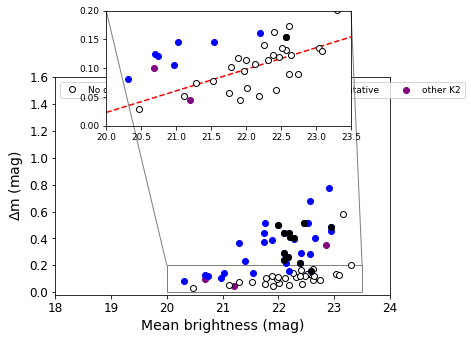

In [10]:

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from numpy import arange
fig, ax = plt.subplots()

def objective(x, a, b):
    return a * x + b

popt, _ = curve_fit(objective, curve_zp_nodetect, curve_Amp_nodetect_3)
a, b = popt
print('y = %.10f * x + %.5f' % (a, b))
x_line = arange(20, 25.5)
y_line = objective(x_line, a, b)

#print(Amp_nodetect_3[7],Amp_nodetect_3[21])
#print(zp_nodetect[7], zp_nodetect[21])
#print(zp_nodetect)
ampnodetect3figure = [0.135, 0.129, 0.09,  0.114, 0.201, 0.219, 0.117, 0.582, 0.132, 0.231, 0.102,
 0.057, 0.135, 0.108, 0.123 ,0.078, 0.051 ,0.075, 0.066 ,0.03,   0.09,  0.096,
 0.045 ,0.12,  0.114 ,0.141, 0.123 ,0.162, 0.063 ,0.051, 0.174]

zpnodetectfigure=[23.0408, 23.0795, 22.6197, 22.3123, 23.303, 68353.3, 21.8831, 23.1622, 22.57, 17.8176, 21.7803, 21.76, 22.5174, 22.122, 22.6466, 21.53, 21.1089, 21.2886, 22.0129, 20.4704, 22.741, 21.973, 21.9083, 22.4709, 22.0013, 22.2617, 22.3843, 22.4045, 22.4271, 22.1835, 22.6142]

ax.plot(zpnodetectfigure, ampnodetect3figure, 'w.',markersize=12, markeredgecolor='k', label='No detected period')
ax.plot(zp, Amp, 'b.',markersize=12, markeredgecolor='b', label = 'Detected period')
ax.legend(loc='upper left', fontsize=8.5, frameon=False)
ax.plot(zp[2], Amp[2], 'k.',markersize=12, markeredgecolor='k', label='Tentative')
ax.plot(zp[6], Amp[6], 'k.',markersize=12, markeredgecolor='k')
ax.plot(zp[9], Amp[9], 'k.',markersize=12, markeredgecolor='k')
ax.plot(zp[34], Amp[34], 'k.',markersize=12, markeredgecolor='k')
ax.plot(zp[8], Amp[8], 'k.',markersize=12, markeredgecolor='k')
ax.plot(zp[23], Amp[23], 'k.',markersize=12, markeredgecolor='k')
ax.plot(zp[18], Amp[18], 'k.',markersize=12, markeredgecolor='k')
ax.plot(zp[22], Amp[22], 'k.',markersize=12, markeredgecolor='k')
ax.plot(zp[28], Amp[28], 'k.',markersize=12, markeredgecolor='k')
ax.plot(zp[26], Amp[26], 'k.',markersize=12, markeredgecolor='k')
ax.plot(zp[19], Amp[19], 'k.',markersize=12, markeredgecolor='k')
ax.plot(zp[11], Amp[11], 'k.',markersize=12, markeredgecolor='k')
ax.plot(zp[30], Amp[30], 'k.',markersize=12, markeredgecolor='k')
ax.plot(zp[32], Amp[32], 'k.',markersize=12, markeredgecolor='k')
ax.plot(17.8176, 0.231, 'w.', markersize=12, markeredgecolor='white')
ax.scatter(andris_mean, andris_a, color='purple', label='other K2')

axins = inset_axes(ax, 3.4,1.6 , loc=3, bbox_to_anchor=(100, 200))#,bbox_transform=axfft.figure.transFigure)
axins.plot(x_line, y_line, '--', color='red')
axins.plot(zp, Amp, 'b.',markersize=12, markeredgecolor='b')
axins.plot(zpnodetectfigure, ampnodetect3figure, 'w.',markersize=12, markeredgecolor='k')
axins.plot(zp[2], Amp[2], 'k.',markersize=12, markeredgecolor='k')
axins.plot(zp[6], Amp[6], 'k.',markersize=12, markeredgecolor='k')
axins.plot(zp[9], Amp[9], 'k.',markersize=12, markeredgecolor='k')
axins.plot(zp[34], Amp[34], 'k.',markersize=12, markeredgecolor='k')
axins.plot(zp[8], Amp[8], 'k.',markersize=12, markeredgecolor='k')
axins.plot(zp[23], Amp[23], 'k.',markersize=12, markeredgecolor='k')
axins.plot(zp[18], Amp[18], 'k.',markersize=12, markeredgecolor='k')
axins.plot(zp[22], Amp[22], 'k.',markersize=12, markeredgecolor='k')
axins.plot(zp[28], Amp[28], 'k.',markersize=12, markeredgecolor='k')
axins.plot(zp[26], Amp[26], 'k.',markersize=12, markeredgecolor='k')
axins.plot(zp[19], Amp[19], 'k.',markersize=12, markeredgecolor='k')
axins.plot(zp[11], Amp[11], 'k.',markersize=12, markeredgecolor='k')
axins.plot(zp[30], Amp[30], 'k.',markersize=12, markeredgecolor='k')
axins.plot(zp[32], Amp[32], 'k.',markersize=12, markeredgecolor='k')
axins.scatter(andris_mean, andris_a, color='purple')
#axins.plot(x_line, y_line, '--', color='red')
x1, x2, y1, y2 = 20.0, 23.5, 0.0, 0.2
axins.set_xlim(x1, x2) 
axins.set_ylim(y1, y2) 
plt.xticks(visible=True, fontsize=9)
plt.yticks(visible=True, fontsize=9)
mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5")
#axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
#axins.imshow(zp, Amp, extent=extent, interpolation="nearest",
#             origin="lower")


plt.rcParams['figure.figsize'] = [8, 6]
ax.set_xlabel('Mean brightness (mag)', fontsize=14)
ax.set_ylabel('$\Delta$m (mag)', fontsize=14)
ax.set_xlim(18,24)
ax.set_ylim(-0.02,1.6)
ax.legend(loc='upper left', fontsize=9, ncol=4)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.savefig('A_vs_mean_brightness_tentative.png')
#plt.imshow()

#np.shape(Amp_all)
#kulon amiknek lett p det.
#tentative kulon
#detektalas hatar :ilyen fenyesseg mellett ilyen amplituot tudonk detektalni

#m*x+b

y = 0.0856506092 * x + -0.12183
[0.05530486 0.34011588]


y = 0.0293512822 * x + -0.05484
[0.02591266 0.15896068]


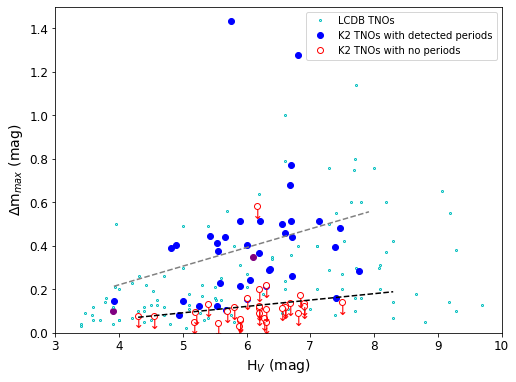

In [11]:
#plt.plot(H_s ,Amp_s, 'w.', markersize=4, markeredgecolor='k', label='Showalter TNOs')

plt.plot(H_lcdb_tno, amp_lcdb_tno, 'w.', markersize=4, markeredgecolor='c', label='LCDB TNOs')#, markeredgecolor='k')
plt.scatter(andris_h,andris_a, color='purple')

data=np.array([H,Amp])
datat=data.transpose()
asd=np.savetxt('H_vs_amp.txt', datat)

plt.plot(H, Amp, 'b.', markersize=12, markeredgecolor='b', label='K2 TNOs with detected periods')#, markeredgecolor='k')

popt, pcov = curve_fit(objective, H, Amp)
a, b = popt
print('y = %.10f * x + %.5f' % (a, b))
print(np.sqrt(np.diag(pcov)))
x_line = arange(min(H), 8)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, '--', color='gray')


#model = np.polyfit(H, Amp,1)
#from sklearn.metrics import r2_score
#predict = np.poly1d(model)
#print(r2_score(Amp, predict(H)))
#print(coef)
#poly1d_fn = np.poly1d(coef)
#plt.plot(H, poly1d_fn(H), color='red', linestyle='--',linewidth='0.3')
Hnodetect_figure=[6.68, 6.6, 6.8, 6.2, 6.2, 6.3, 5.8, 6.16, 5.4, 5.7, 5.9, 6.9, 6.3, 6.9, 4.3, 5.18, 4.55, 6.27, 5.88, 6.2, 5.2, 5.56, 6.61, 6.56, 7.5, 6.2, 6.0, 5.9, 6.3, 6.84]
Ampnodetect_figure=[0.135, 0.129, 0.09,  0.114, 0.201, 0.219, 0.117, 0.582, 0.132, 0.102,
 0.057, 0.135, 0.108, 0.123, 0.078, 0.051, 0.075, 0.066, 0.03, 0.09,  0.096,
 0.045, 0.12,  0.114, 0.141, 0.123, 0.162, 0.063, 0.051, 0.174]


H_nodetect_off = np.array([Hnodetect_figure])-0.015
H_nodetect_off = H_nodetect_off[0,:]

Amp_nodetect_3_off = np.array([Ampnodetect_figure])-0.035
Amp_nodetect_3_off = Amp_nodetect_3_off[0,:]

plt.plot(Hnodetect_figure ,Ampnodetect_figure, 'w.', markersize=12, markeredgecolor='r', label='K2 TNOs with no periods')
plt.plot(H_nodetect_off,Amp_nodetect_3_off, linestyle='none', marker=r'$\downarrow$', color= 'red',ms=9, mew=0.09)

popt, pcov = curve_fit(objective, Hnodetect_figure, Ampnodetect_figure)
a, b = popt
print('\n')
#model = np.polyfit(H_nodetect, Amp_nodetect_3,1)
#from sklearn.metrics import r2_score
#predict = np.poly1d(model)
#print(r2_score(Amp_nodetect_3, predict(H_nodetect)))
print('y = %.10f * x + %.5f' % (a, b))
print(np.sqrt(np.diag(pcov)))
x_line = arange(min(Hnodetect_figure), 9)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, '--', color='black')


plt.ylim(0,1.5)
plt.ylabel('$\Delta$m$_{max}$ (mag)', fontsize=14)
plt.xlabel('H$_{V}$ (mag)', fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.xlim(3,10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.plot(6.4, 0.231,'wo', markersize=9, markeredgecolor='white')
#plt.plot(6.4-0.02,0.231-0.03, linestyle='none', marker=r'$\downarrow$', color= 'white',ms=9.5, mew=0.1)

plt.savefig('A_vs_H.png')



median troj jup :  1.8970832345269149 + 1.3411321313544118 - 0.7916289294638139
median k2hilda :  1.2222517407052922 + 1.8754728055647563 - 0.6910981424360734
median lcdbtno:  2.7149321266968327 + 1.6341997086632647 - 0.3471732601449775
median cold:  1.2079726192872962 + 1.5879509252059716 - 0.6353870149797582
median non-cold:  0.8290462408669939 + 1.8074998728601461 - 0.2373723793469533
---
H truj jup:  11.6 + 0.9864603435571256 - 0.9864603435571256
H k2hilda:  13.7 + 1.0736402025067688 - 1.0736402025067688
H lcdbtno:  6.26 + 2.659559763104719 - 2.659559763104719
H cold:  6.3 + 0.5732256574168566 - 0.5732256574168566
H nocold:  5.95 + 0.8712619132204571 - 0.8712619132204571


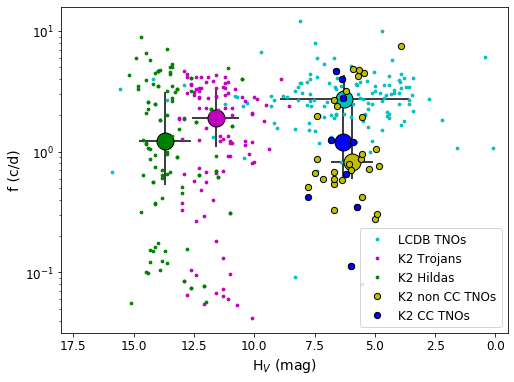

In [12]:
fig, ax = plt.subplots()
y2 = -1*freq_lcdb_hilda


ax.plot(median_h_jup, median_freq_jup, 'mo',markeredgecolor='k',markersize='17')

ax.errorbar(median_h_jup, median_freq_jup, np.array([[d_std_jup], [freqjup_std]]) ,np.array([[hjup_std], [hjup_std]]), color='black')


ax.plot(median_h_k2hilda, median_freq_k2hilda, 'go',markeredgecolor='k',markersize='17')

ax.errorbar(median_h_k2hilda, median_freq_k2hilda, np.array([[d_std], [freqhilda_std]]) ,np.array([[hhilda_std], [hhilda_std]]), color='black')



ax.plot(median_h_lcdbtno, median_freq_lcdbtno, 'co',markeredgecolor='k',markersize='17')

ax.errorbar(median_h_lcdbtno, median_freq_lcdbtno, np.array([[d_std_lcdbtno], [freqlcdbtno_std]]) ,np.array([[hlcdbstd_std], [hlcdbstd_std]]), color='black')


ax.plot(median_h_cold, median_freq_cold, 'bo',markeredgecolor='k',markersize='17')

ax.errorbar(median_h_cold, median_freq_cold, np.array([[d_std_cold], [freqcold_std]]) ,np.array([[hcold_std], [hcold_std]]), color='black')


ax.plot(median_h_nocold, median_freq_nocold, 'yo',markeredgecolor='k',markersize='17')

ax.errorbar(median_h_nocold, median_freq_nocold, np.array([[d_std_nocold], [freqnocold_std]]) ,np.array([[hnocold_std], [hnocold_std]]), color='black')

print('median troj jup : ',median_freq_jup, '+', freqjup_std, '-', d_std_jup)
print('median k2hilda : ',median_freq_k2hilda, '+', freqhilda_std, '-', d_std)
print('median lcdbtno: ',median_freq_lcdbtno, '+', freqlcdbtno_std, '-', d_std_lcdbtno)
print('median cold: ',median_freq_cold, '+', freqcold_std, '-', d_std_cold)
print('median non-cold: ',median_freq_nocold, '+', freqnocold_std, '-', d_std_nocold)
print('---')
print('H truj jup: ',median_h_jup, '+', hjup_std, '-', hjup_std)
print('H k2hilda: ',median_h_k2hilda, '+', hhilda_std, '-', hhilda_std)
print('H lcdbtno: ',median_h_lcdbtno, '+', hlcdbstd_std, '-', hlcdbstd_std)
print('H cold: ',median_h_cold, '+', hcold_std, '-', hcold_std)
print('H nocold: ',median_h_nocold, '+', hnocold_std, '-', hnocold_std)

#ax.plot(H_l, P_s, 'k.', markersize='1.5')   #red: our results, black: lcdb and showalter
#ax.plot(H_s, freq_s, 'k.',  markersize='3.5', label='Showalter TNOs')
ax.plot(H_lcdb_tno, freq_lcdb_tno, 'c.', markersize='5.5', label='LCDB TNOs')
#ax.plot(H_lcdb_hilda, freq_lcdb_hilda, 'r.', markersize='3.5', label='LCDB Hildas')
ax.plot(H_jup, freq_jup, 'm.', markersize='5.5', label='K2 Trojans')
ax.plot(k2_hilda_H, freq_k2hilda, 'g.', markersize='5.5', label='K2 Hildas')
ax.plot(H, freq, 'y.',  markersize='12.5', markeredgecolor='k',label='K2 non CC TNOs')
ax.plot(H_cold, freq_cold, 'b.',  markersize='12.5', markeredgecolor='k',label='K2 CC TNOs')




fast_rotator_x=[-1, 18]  
#fast_rotator_y=[1.98, 1.98]
#ax.plot(fast_rotator_x, fast_rotator_y, linestyle='--', color='green', linewidth='0.6')
#ax.plot(fast_rotator_x, fast_rotator_y, linestyle='--', color='black', linewidth='0.8')
ax.set_xlim(18,-0.5)
#ax.text(1.9,(24/9.48)+0.05,'P = 9.48 h')
#ax.text(1.9,1.95+0.05,'P = 12.3 h')

#ax.plot(median_h_k2hilda, median_freq_k2hilda, 'go',markeredgecolor='k',markersize='17')

#ax.errorbar(median_h_k2hilda, median_freq_k2hilda, np.array([[d_std], [freqhilda_std]]) ,np.array([[hhilda_std], [hhilda_std]]), color='black')
#print(median_h_k2hilda, median_freq_k2hilda)






ax.set_xlabel('H$_{V}$ (mag)', fontsize=14)
ax.set_ylabel('f (c/d)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_yscale('log')

ax.legend(fontsize=12)

plt.savefig('H_vs_freq2.png')




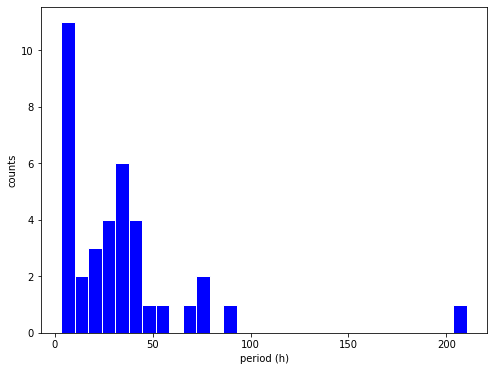

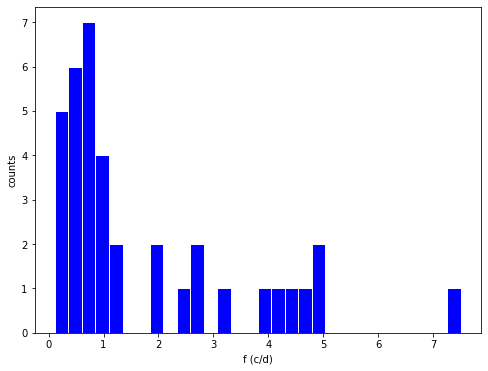

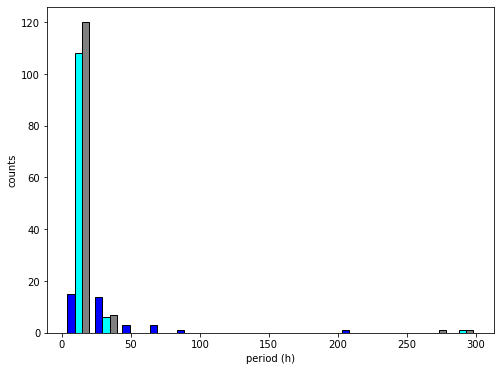

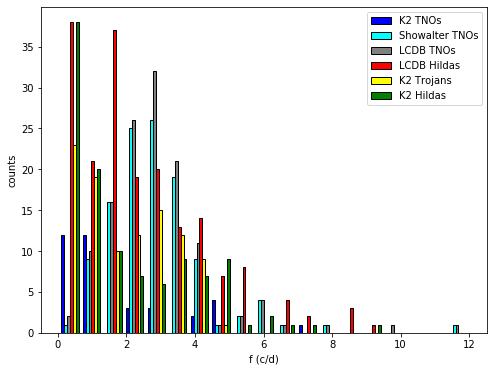

In [13]:
#### HISTOGRAMS ###


plt.hist(P, color='blue', bins=30, edgecolor='white')  #our
plt.xlabel('period (h)')
plt.ylabel('counts')
plt.show()

plt.hist(freq, color='blue', bins=30, edgecolor='white')  #our
plt.xlabel('f (c/d)')
plt.ylabel('counts')
plt.show()



colors=['blue', 'cyan', 'gray']  #our vs literature (showalter)
plt.hist([P, P_s, P_lcdb_tno], color=colors, edgecolor='black', bins=15)
plt.xlabel('period (h)')
plt.ylabel('counts')
#plt.xlim(-1,100)
plt.show()


plt.hist([freq, freq_s, freq_lcdb_tno, freq_lcdb_hilda, freq_jup, freq_k2hilda], color=['blue', 'cyan', 'gray', 'red', 'yellow', 'green'], bins=19, edgecolor='black', label=['K2 TNOs', 'Showalter TNOs', 'LCDB TNOs', 'LCDB Hildas', 'K2 Trojans', 'K2 Hildas'])  #our
plt.xlabel('f (c/d)')
#plt.xscale('log')
plt.legend()
plt.ylabel('counts')
plt.show()

def plot_loghist(x, bins):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins)
  plt.xscale('log')
    



#atir logra


(array([ 35, 119]),)


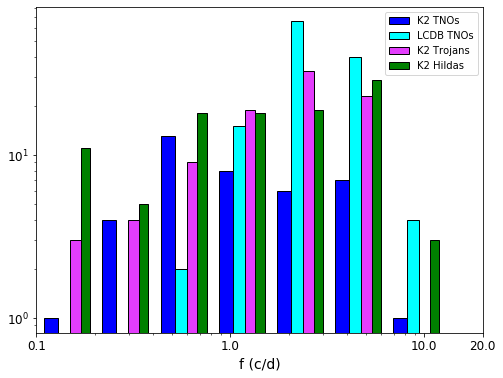

In [14]:
freq_hist=[4.25079702, 1.04588835, 0.70999615, 4.67107824, 0.68000227, 0.87600832,
 2.77809932, 0.86724001, 0.58248186, 0.11400017, 0.27799979, 1.2439745,
 0.65800296, 0.59619923, 3.16580926, 1.93283402, 0.72400374, 4.51552211,
 0.79085247, 4.79233227, 3.98208064, 7.5 ,       0.54096698, 2.38592305,
 4.80769231, 1.97400888, 0.59199329, 0.95965452, 0.42127435, 0.32785989,
 2.68817204, 0.7600228,  0.66800267, 1.20797262, 0.35199906, 0.30461492,
 0.51370963, andris_f[0], andris_f[1], andris_f[2]]

plt.hist([freq_hist, freq_lcdb_tno, freq_jup, freq_k2hilda], np.logspace(-1,2,11),color=['blue', 'cyan', '#e33dfc', 'green'], edgecolor='black', label=['K2 TNOs', 'LCDB TNOs', 'K2 Trojans', 'K2 Hildas'])
plt.gca().set_xscale("log")
plt.legend()
plt.xlim(0.1, 20)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
ax = plt.gca()
ax.set_xticks([0.1,1,10,20])
plt.yscale('log')
plt.xlabel('f (c/d)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

print(np.where(freq_lcdb_tno<=0.24))

plt.savefig('freq_hist2.png')

#gyanus showalteres tno
#2014JP80, 2014JT80

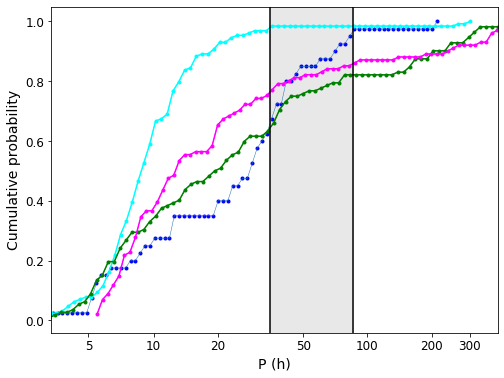

In [15]:
#### CUMULATIVE DISTRIBUTION ####


count, bins_count = np.histogram(np.log(P_andrissal), bins=80)

pdf = count / sum(count)

cdf = np.cumsum(pdf)


plt.plot(bins_count[1:], cdf, 'b.')
plt.plot(bins_count[1:], cdf, linewidth='0.5')

'''
count_s, bins_count_s = np.histogram(np.log(P_s), bins=80)

pdf_s = count_s / sum(count_s)

cdf_s = np.cumsum(pdf_s)

plt.plot(bins_count_s[1:], cdf_s, 'c.')
plt.plot(bins_count_s[1:], cdf_s, linewidth='0.5', color='cyan')
'''

count_lcdb, bins_count_lcdb = np.histogram(np.log(P_lcdb_tno), bins=80)

pdf_lcdb = count_lcdb / sum(count_lcdb)

cdf_lcdb = np.cumsum(pdf_lcdb)

plt.plot(bins_count_lcdb[1:], cdf_lcdb, c='cyan', marker='.')
plt.plot(bins_count_lcdb[1:], cdf_lcdb, linewidth='0.5', c='cyan')




count_lcdb, bins_count_lcdb = np.histogram(np.log(k2_hilda_P), bins=80)

pdf_lcdb = count_lcdb / sum(count_lcdb)

cdf_lcdb = np.cumsum(pdf_lcdb)

plt.plot(bins_count_lcdb[1:], cdf_lcdb, c='green', marker='.')
plt.plot(bins_count_lcdb[1:], cdf_lcdb, linewidth='0.5', c='green')


count_lcdb, bins_count_lcdb = np.histogram(np.log(P_jup), bins=80)

pdf_lcdb = count_lcdb / sum(count_lcdb)

cdf_lcdb = np.cumsum(pdf_lcdb)

plt.plot(bins_count_lcdb[1:], cdf_lcdb, c='magenta', marker='.')
plt.plot(bins_count_lcdb[1:], cdf_lcdb, linewidth='0.5', c='magenta')


#plt.ylim(0.8,1.05)

plt.xlabel('P (h)', fontsize=14)
plt.ylabel('Cumulative probability', fontsize=14)
#plt.gca().set_xscale("log")
#plt.xscale('log')
#plt.xlim(4,6.5)
plt.axvline(x=3.55, color='k')
plt.axvline(x=4.45, color='k')
plt.axvspan(3.55, 4.45, alpha=0.5, color='lightgray')
x = [0,1.6,2.3,2.99,3.912,4.6,5.29,5.7]
new_x=[1, 5,10,20, 50, 100, 200,300]
plt.xticks(x, new_x)
plt.xlim(1.2,6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('cumulative.png')
#tickeket atirni logra 
#miert forognak lassabban a hildak mint a tno-k




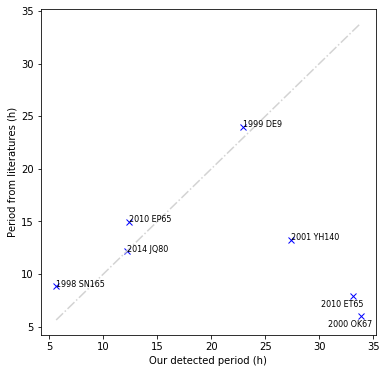

In [16]:
#### literature comparesion #####
plt.figure(figsize=(6,6))

#1998sn165
lp=8.84
op=5.64
plt.plot(op,lp, 'bx')

plt.text(op,lp, '1998 SN165', fontsize=8)


#1999de9

lp=24.0
op=22.94
plt.plot(op,lp, 'bx')

plt.text(op,lp, '1999 DE9', fontsize=8)


#2000ok67

lp=6.0
op=33.803
plt.plot(op,lp, 'bx')

plt.text(op-3,lp-1, '2000 OK67', fontsize=8)


#2001yh140

lp=13.25
op=27.39
plt.plot(op,lp, 'bx')

plt.text(op,lp, '2001 YH140', fontsize=8)


#2010ep65

lp=14.97
op=12.41
plt.plot(op,lp, 'bx')

plt.text(op,lp, '2010 EP65', fontsize=8)


#2010et65

lp=7.88
op=33.15
plt.plot(op,lp, 'bx')

plt.text(op-3,lp-1, '2010 ET65', fontsize=8)


#2014jq80

lp=12.16
op=12.158
plt.plot(op,lp, 'bx')

plt.text(op,lp, '2014 JQ80', fontsize=8)




ident = [5.64, 33.803]
plt.plot(ident,ident, linestyle='-.', color='lightgray')
#plt.xlim(3.0,35.0)

plt.xlabel('Our detected period (h)')
plt.ylabel('Period from literatures (h)')

plt.savefig('literature_KELL_MEG.png')
#pdf-kent menteni

(37,)
(37,)


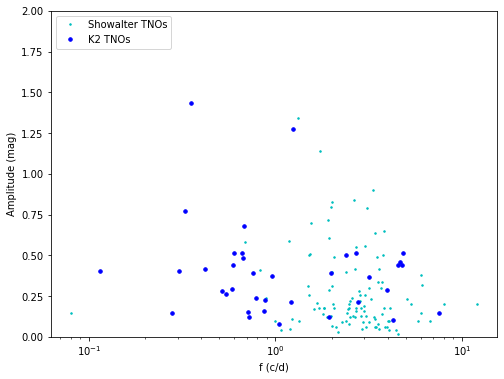

In [17]:
#### PERIOD-AMPLITUDE (TNOS ONLY) ####

plt.plot(freq_s, Amp_s, 'c.', markersize=3, label='Showalter TNOs') #showalter
#plt.plot(freq_lcdb_tno, amp_lcdb_tno, 'k.', markersize=3, label='LCDB TNOs')
plt.plot(freq, Amp, 'b.', markersize=7, label='K2 TNOs')#our only

print(np.shape(freq))
print(np.shape(Amp))

plt.xlabel('f (c/d)')
plt.ylabel('Amplitude (mag)')
plt.ylim(0,2)
plt.xscale('log')
plt.legend()
plt.show()


In [18]:
##########  Hv vs Rotrate #####


##Csilla

##fig


#8

1.2176806640625
2014ez51
3.2


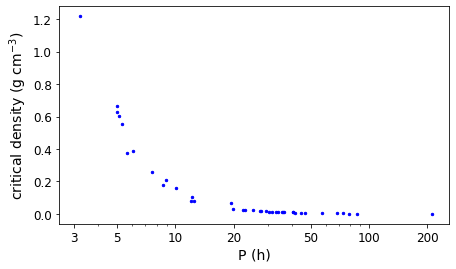

In [19]:
##### critical densities ###
plt.figure(figsize=(7,4))
#rho_c_lcdb=[]
#for Pi_lcdb, Ampi_lcdb in zip(P_lcdb_tno, amp_lcdb_tno):
#    rho_c_lcdb.append(((1089*(Ampi_lcdb+1))/(100*Pi_lcdb*Pi_lcdb)))
#plt.plot( rho_c_lcdb, P_lcdb_tno,'kx', markersize='3.8')

#rho_c_s=[]
#for Pi_s, Ampi_s in zip(P_s, Amp_s):
#    rho_c_s.append(((1089*(Ampi_s+1))/(100*Pi_s*Pi_s)))
#plt.plot( rho_c_s, P_s,'c.', markersize='3.8')

rho_c=[]
for Pi, Ampi in zip(P, Amp):
    rho_c.append(((1089*(Ampi+1))/(100*Pi*Pi)))
rho_c_andris=[]
for Pj, Ampj, in zip(andris_p, andris_a):
    rho_c_andris.append(((1089*(Ampj+1))/(100*Pj*Pj)))
plt.plot( andris_p, rho_c_andris,'b.', markersize='4.8')
plt.plot( P, rho_c,'b.', markersize='4.8')
plt.xlabel('P (h)', fontsize=14)
plt.ylabel('critical density (g cm$^{-3}$)', fontsize=14)
plt.xscale('log')
#tick atir
#print(rho_c)
print(rho_c[21])
print(name[21])
print(P[21])
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax = plt.gca()
ax.set_xticks([3,5,10,20,50,100, 200])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(2.5)
plt.savefig('crit_dens.png')

2
4
6
8
10


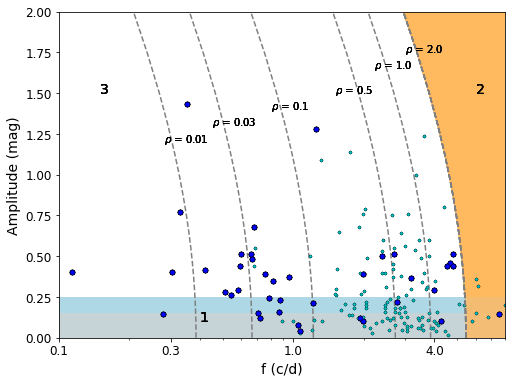

In [20]:
##### gorbek

data_gorbe = np.genfromtxt('freq_amp.txt')


amp_gorbe = data_gorbe[:,0]
#print(np.shape(freq))
#print(np.shape(Amp))

for i in range(2,11,2):
    freq_gorbe = data_gorbe[:,i]
    print(i)
    plt.plot(freq_gorbe,amp_gorbe, color='gray', linestyle='--')
    #plt.plot(freq_lcdb_tno, amp_lcdb_tno, 'c.', markeredgecolor='black',markersize=3, markeredgewidth=0.2,label='Showalter TNOs') #showalter
    plt.xlim(0.1,8)
    plt.ylim(0,2)
    plt.plot(freq_lcdb_tno, amp_lcdb_tno, 'c.', markeredgecolor='black', markersize=6, markeredgewidth=0.2, label='LCDB TNOs')
    plt.plot(andris_f, andris_a, 'b.', markeredgecolor='black', markersize=10, markeredgewidth=0.5)
    plt.plot(freq, Amp, 'b.', markersize=10,markeredgecolor='black', markeredgewidth=0.5, label='K2 TNOs')
    plt.xlabel('f (c/d)', fontsize=14)
    plt.ylabel('Amplitude (mag)', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.text(3.0,1.75, r'$\rho$ = 2.0')
    plt.text(2.2,1.65, r'$\rho$ = 1.0')
    plt.text(1.5,1.5, r'$\rho$ = 0.5')
    plt.text(0.8,1.4, r'$\rho$ = 0.1')
    plt.text(0.45,1.3, r'$\rho$ = 0.03')
    plt.text(0.28,1.2, r'$\rho$ = 0.01')
    plt.xscale('log')
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
    ax = plt.gca()
    ax.set_xticks([0.1,0.3,1,4])
    plt.plot(data_gorbe[:,11],amp_gorbe, color='gray', linestyle='--')
    plt.axhspan(0.0, 0.25, facecolor='lightblue', alpha=0.5)
    plt.axhspan(0.0, 0.15, facecolor='lightgray', alpha=0.5)
    plt.axvspan(5.5, 8.0, facecolor='#ffb95e', alpha=0.5)
    plt.axvspan(5.4, 8.0, facecolor='#ffb95e', alpha=0.5)
    #for ix in np.arange(3.100,5.39,0.01):
    #    for iy in np.arange(0.71,1.99,0.01):
    #        plt.axvspan(ix, iy, facecolor='#ffb95e', alpha=0.5)
    #    print(ix)
    #        #for iy in np.arange(0.2, 2.0, 0.1):
     #     ax.axvline(x=ix, ymin=8.0, linewidth=8, color='#ffb95e')
    plt.axvspan(xmin=3.9, xmax=5.0, ymin=1.75, color='#ffb95e') 
    plt.fill_between( data_gorbe[:,11], 6.0, amp_gorbe, color='#ffb95e')
    plt.text(0.15,1.5, '3', fontsize=14)
    plt.text(6.0,1.5, '2', fontsize=14)
    plt.text(0.4,0.1, '1', fontsize=14)
    #ax.axvline(x=5.38, ymin=0.4, linewidth=8, color='#ffb95e')
    #ax.axvline(x=5.398, ymin=0.27, linewidth=8, color='#ffb95e')
#plt.legend(loc='upper right')
    #plt.show()
#rho 2 legyen 5 helyett 
    plt.savefig('freq_vs_amp.png')
    
#utkozesek felulmuljak a YORPot

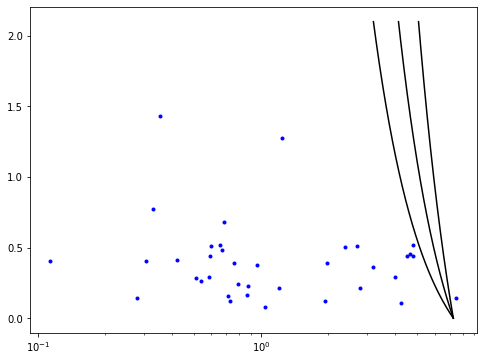

In [21]:
'''rho_c=[]
for Pi, Ampi in zip(P, Amp):
    rho_c.append(((1089*(Ampi+1))/(100*Pi*Pi)))'''

rho_c= np.array([0.5])
P_c= np.asarray([])
Amp_c= np.arange(0,2.1,0.0001)
P_c = 3.3 * np.sqrt((1+Amp_c/rho_c))
P_c = np.sort(P_c)
freq_c= 24/np.array([P_c])
freq_c = freq_c[0,:]
plt.plot(freq_c, Amp_c, 'k-')



rho_c= np.array([1.0])
P_c= np.asarray([])
Amp_c= np.arange(0,2.1,0.0001)
P_c = 3.3 * np.sqrt((1+Amp_c/rho_c))
P_c = np.sort(P_c)
freq_c= 24/np.array([P_c])
freq_c = freq_c[0,:]
plt.plot(freq_c, Amp_c, 'k-')



rho_c= np.array([2.0])
P_c= np.asarray([])
Amp_c= np.arange(0,2.1,0.0001)
P_c = 3.3 * np.sqrt((1+Amp_c/rho_c))
P_c = np.sort(P_c)
freq_c= 24/np.array([P_c])
freq_c = freq_c[0,:]
plt.plot(freq_c, Amp_c, 'k-')



plt.plot(freq, Amp, 'b.')
plt.xscale('log')


y = 0.0374437024 * x + -0.72568


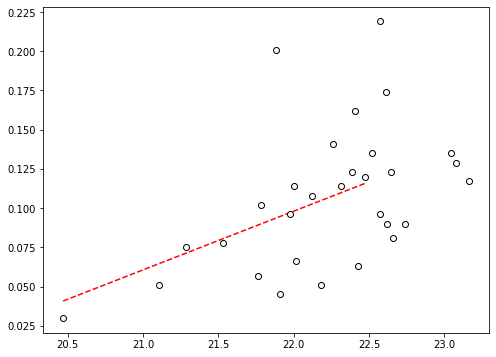

In [22]:
curve_amp = [0.045, 0.043, 0.030, 0.038, 0.067, 0.073, 0.039, 0.032, 0.034, 0.019, 0.045, 0.036, 0.041, 0.026, 0.017, 0.025, 0.022, 0.01, 0.027, 0.03, 0.032, 0.015, 0.04, 0.038, 0.047, 0.041, 0.054, 0.021, 0.017, 0.058 ]

curve_H_nodetect = [6.68, 6.6, 6.8, 6.2, 6.2, 6.3, 5.8, 7.77, 5.7, 5.9, 6.9, 6.3, 6.9, 4.3, 5.18, 4.55, 6.27, 5.88, 4.9, 6.2, 5.2, 5.56, 6.61, 6.56, 7.5, 6.2, 6.0, 5.9, 6.3, 6.84]


curve_Amp_nodetect_3 = np.array([curve_amp])*3
curve_Amp_nodetect_3 = curve_Amp_nodetect_3[0,:]

curve_zp_nodetect=[zp_all[2], zp_all[5], zp_all[6], zp_all[7], zp_all[10], zp_all[11], zp_all[14], zp_all[15], zp_all[18], zp_all[19],  zp_all[23],  zp_all[26], zp_all[27], zp_all[28], zp_all[31], zp_all[32], zp_all[33], zp_all[37], zp_all[41], zp_all[42], zp_all[44], zp_all[45], zp_all[46], zp_all[49], zp_all[50], zp_all[53], zp_all[54], zp_all[55], zp_all[57], zp_all[60]]
popt, _ = curve_fit(objective, curve_zp_nodetect, curve_Amp_nodetect_3)
a, b = popt
print('y = %.10f * x + %.5f' % (a, b))
x_line = arange(min(curve_zp_nodetect), max(curve_zp_nodetect))
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, '--', color='red')

plt.plot(curve_zp_nodetect, curve_Amp_nodetect_3,'w.',markersize=12, markeredgecolor='k')


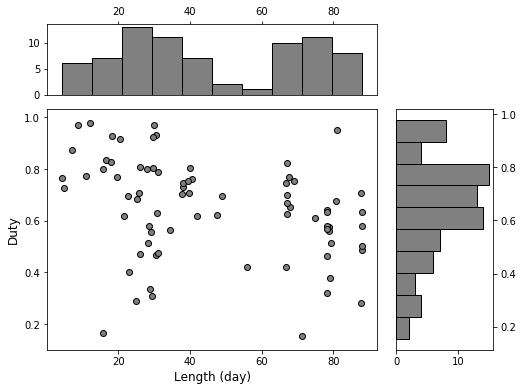

In [23]:
length = [67.6148,
30.0170,
25.9915,
78.2811,
79.1802,
 4.2910,
74.8278,
47.5899,
81.1418,
28.0758,
30.9773,
28.8522,
30.7934,
87.9667,
16.5512,
11.9945,
78.7646,
18.1042,
30.3643,
66.8383,
25.0720,
39.6208,
21.4348,
 4.9245,
55.8859,
78.2403,
48.9998,
25.0107,
15.8000,
88.0075,
67.0631,
37.6387,
67.8191,
69.1269,
80.7945,
10.9115,
29.4244,
67.0018,
40.1316,
87.6193,
66.9405,
22.5996,
78.2403,
38.0474,
66.7566,
20.4132,
30.4461,
17.9407,
 6.9679,
78.8124,
79.2619,
40.4585,
29.6287,
22.8448,
78.2198,
42.0115,
78.2607,
37.9452,
39.3551,
19.4937,
25.7872,
87.7419,
34.4715,
67.0631,
31.0387,
88.0075,
87.9871,
28.1371,
29.7513,
25.9711,
28.5866,
15.6113,
29.1588,
78.3424,
 8.6843,
71.2111,
]


duty=[ 0.770, 
 0.969 ,
 0.472 ,
 0.319 ,
 0.379 ,
 0.766 ,
 0.609 ,
 0.623 ,
 0.953 ,
 0.799 ,
 0.788 ,
 0.335 ,
 0.631 ,
 0.485 ,
 0.836 ,
 0.979 ,
 0.576 ,
 0.929 ,
 0.932 ,
 0.745 ,
 0.686 ,
 0.707 ,
 0.620 ,
 0.726 ,
 0.419 ,
 0.643 ,
 0.695 ,
 0.291 ,
 0.167 ,
 0.632 ,
 0.700 ,
 0.705 ,
 0.654 ,
 0.755 ,
 0.676 ,
 0.773 ,
 0.310 ,
 0.668 ,
 0.803 ,
 0.709 ,
 0.822 ,
 0.695 ,
 0.578 ,
 0.730 ,
 0.420 ,
 0.915 ,
 0.469 ,
 0.828 ,
 0.873 ,
 0.559 ,
 0.512 ,
 0.762 ,
 0.806 ,
 0.401 ,
 0.633 ,
 0.618 ,
 0.568 ,
 0.747 ,
 0.754 ,
 0.769 ,
 0.709 ,
 0.280 ,
 0.563 ,
 0.627 ,
 0.474 ,
 0.580 ,
 0.501 ,
 0.514 ,
 0.926 ,
 0.809 ,
 0.578 ,
 0.802 ,
 0.557 ,
 0.463 ,
 0.969 ,
 0.155 ,
]
#plt.xlabel('Length', fontsize=14)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
#plt.hist(length, color='gray', ec='k', bins=15)
#plt.savefig('obs_length.png')
#plt.show()

#print(np.shape(length))
#plt.scatter(length,duty, color='gray', edgecolor='black')


from matplotlib.gridspec import GridSpec
import pandas as pd

fig = plt.figure()
gs = GridSpec(4, 4)

ax_scatter = fig.add_subplot(gs[1:4, 0:3])
plt.xlabel('Length (day)', fontsize=12)
plt.ylabel('Duty', fontsize=12)
ax_hist_x = fig.add_subplot(gs[0,0:3])
#plt.title('Duty')
plt.xticks(visible = True)
ax_hist_x.xaxis.set_ticks_position("top")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax_hist_y = fig.add_subplot(gs[1:4,3])
ax_hist_y.yaxis.set_ticks_position("right")
#plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
#plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
#plt.xaxis.ticks_position('top')
ax.yaxis.set_label_position("right")
#plt.ylabel('Length')

plt.xticks(fontsize=10)
plt.yticks(visible = True)
plt.yticks(fontsize=10)
#plt.rcParams['ytick.top']
#plt.rcParams['ytick.bottom'] = plt.rcParams['ytick.labelbottom'] = False
#plt.rcParams['ytick.top'] = plt.rcParams['ytick.labeltop'] = True
ax_scatter.scatter(length,duty, color='gray',edgecolor='black')


ax_hist_x.hist(length,  color='gray',edgecolor='black')
ax_hist_y.hist(duty, orientation = 'horizontal',color='gray',edgecolor='black')
plt.savefig('obs_duty.png')

plt.show()

1
2
3


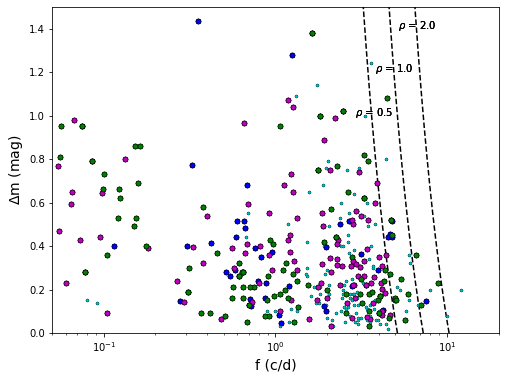

In [89]:
rho_gorbek = np.genfromtxt('crit_dens_curves.txt')

freq_rho_gorbek = rho_gorbek[:,0]
for a in range(1,4,1):
    print(a)
    amp_rho_gorbek=rho_gorbek[:,a]
    plt.plot(freq_rho_gorbek,amp_rho_gorbek, linestyle='--', color='black')
    plt.ylim(0,1.5)
    plt.xlim(0.05,20)
    plt.xscale('log')
    plt.text(2.9,1.0, r'$\rho$ = 0.5')
    plt.text(3.8,1.2, r'$\rho$ = 1.0')
    plt.text(5.2,1.4, r'$\rho$ = 2.0')
    plt.plot(freq_lcdb_tno, amp_lcdb_tno, 'c.', markeredgecolor='black', markersize=6, markeredgewidth=0.2, label='LCDB TNOs')
    plt.plot(andris_f, andris_a, 'b.', markeredgecolor='black', markersize=10, markeredgewidth=0.5)
    plt.plot(freq, Amp, 'b.', markersize=10,markeredgecolor='black', markeredgewidth=0.5, label='K2 TNOs')
    plt.plot(freq_jup, Amp_jup, 'm.', markersize=10,markeredgecolor='black', markeredgewidth=0.5, label='K2 Jupiters')
    plt.plot(freq_k2hilda, k2_hilda_amp, 'g.', markersize=10,markeredgecolor='black', markeredgewidth=0.5, label='K2 Hildas') 
    plt.xlabel('f (c/d)', fontsize=14)
    plt.ylabel('$\Delta$m (mag)', fontsize=14)
    #plt.text(,2.0 )
    plt.savefig('rho_jacobi_gorbek.png')
    
    